In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('ryanair_reviews.csv')

data.dropna(inplace=True)
data = data[['Comment', 'Seat Comfort', 'Value For Money', 'Ground Service', 'Food & Beverages', 'Cabin Staff Service', 'Recommended']]

X = data.drop('Recommended', axis=1)
y = data['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['Comment'])
X_test_tfidf = tfidf.transform(X_test['Comment'])

scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train.drop('Comment', axis=1))
X_test_final = scaler.transform(X_test.drop('Comment', axis=1))

lr_model = LogisticRegression()
lr_model.fit(X_train_final, y_train)
lr_pred = lr_model.predict(X_test_final)
lr_accuracy = accuracy_score(y_test, lr_pred)

svc_model = SVC()
svc_model.fit(X_train_final, y_train)
svc_pred = svc_model.predict(X_test_final)
svc_accuracy = accuracy_score(y_test, svc_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"SVC Accuracy: {svc_accuracy}")

print("Logistic Regression:")
print("Predictions:", lr_pred)
print("Accuracy:", lr_accuracy)

print("\nSVC:")
print("Predictions:", svc_pred)
print("Accuracy:", svc_accuracy)



Logistic Regression Accuracy: 1.0
SVC Accuracy: 0.8333333333333334
Logistic Regression:
Predictions: ['no' 'no' 'yes' 'no' 'no' 'no']
Accuracy: 1.0

SVC:
Predictions: ['no' 'no' 'no' 'no' 'no' 'no']
Accuracy: 0.8333333333333334


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Scores:
count    29.000000
mean     -0.261962
std       0.708582
min      -0.980000
25%      -0.880500
50%      -0.576300
75%       0.548700
max       0.968600
Name: Sentiment_Score, dtype: float64


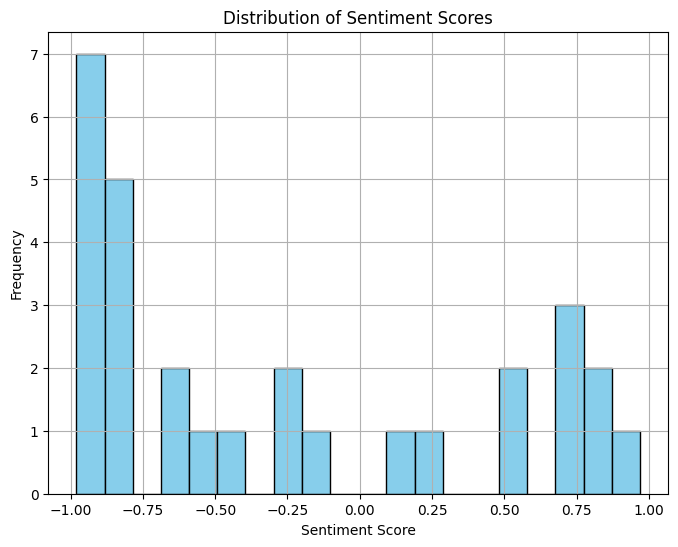

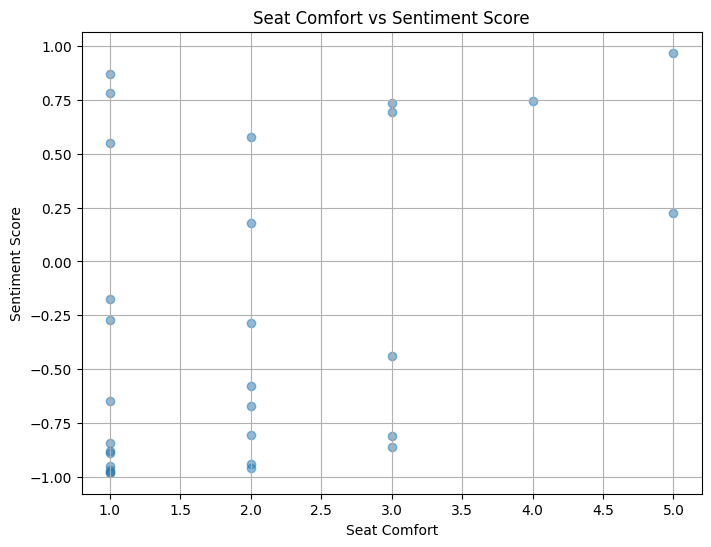

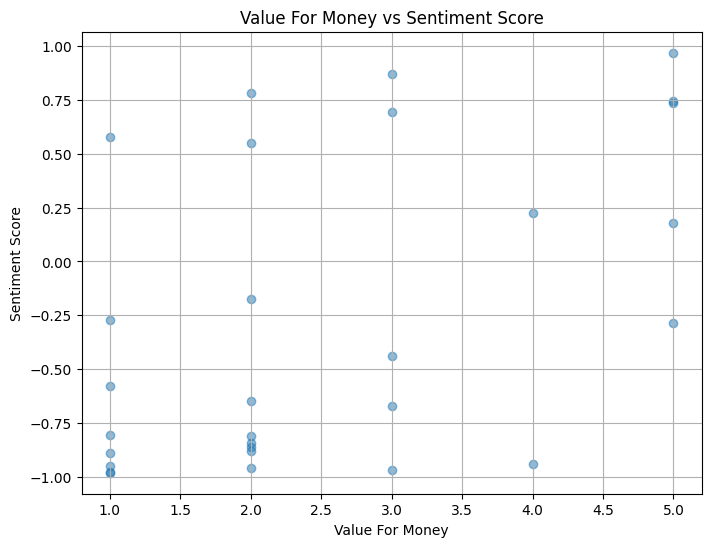

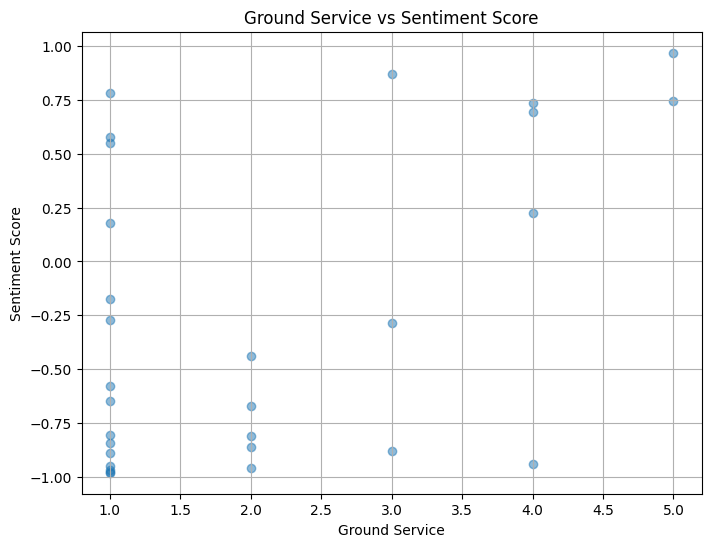

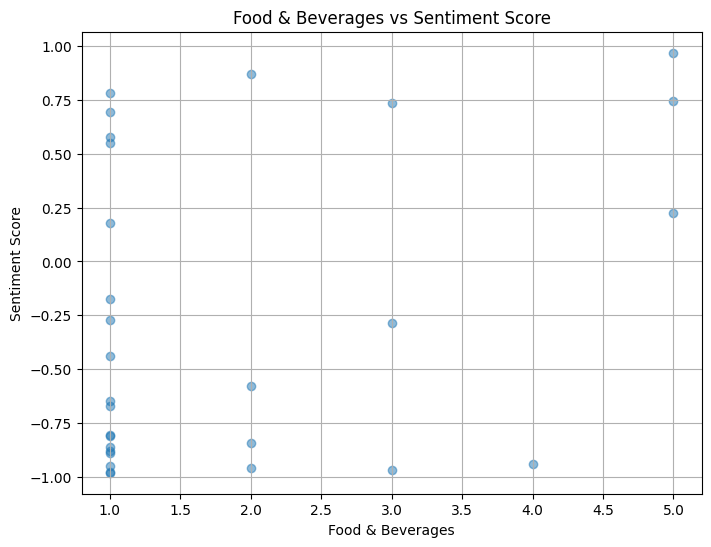

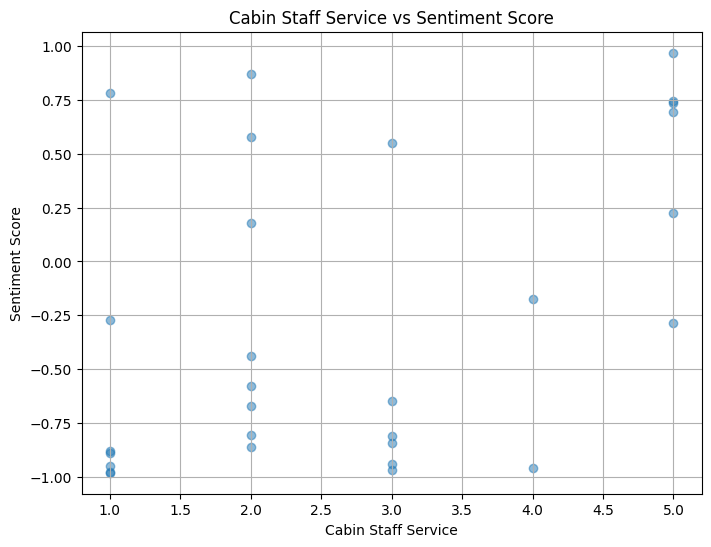

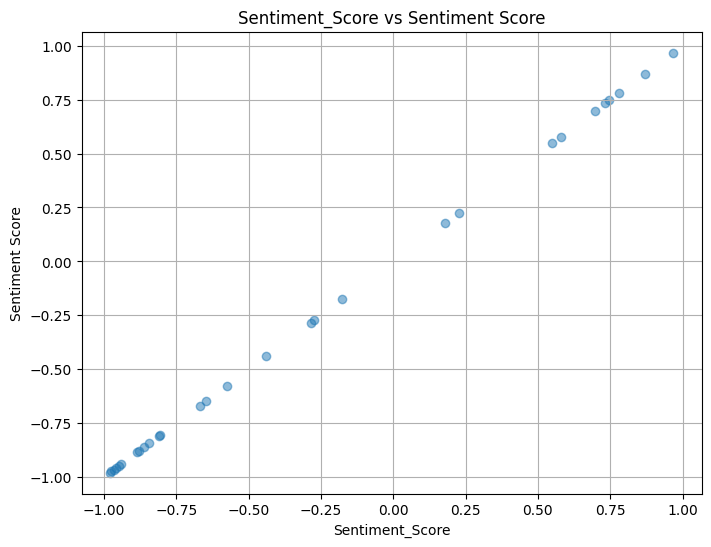

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.model_selection import train_test_split
import pandas as pd

nltk.download('vader_lexicon')

data = pd.read_csv('ryanair_reviews.csv')
data.dropna(inplace=True)

numerical_features = ['Seat Comfort', 'Value For Money', 'Ground Service', 'Food & Beverages', 'Cabin Staff Service']
textual_features = ['Comment']

analyzer = SentimentIntensityAnalyzer()
data['Sentiment_Score'] = data['Comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

numerical_features.append('Sentiment_Score')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('tfidf', TfidfVectorizer(), 'Comment')
    ])
print("Sentiment Scores:")
print(data['Sentiment_Score'].describe())

plt.figure(figsize=(8, 6))
plt.hist(data['Sentiment_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['Sentiment_Score'], alpha=0.5)
    plt.title(f'{feature} vs Sentiment Score')
    plt.xlabel(feature)
    plt.ylabel('Sentiment Score')
    plt.grid(True)
    plt.show()


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00         5
         yes       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



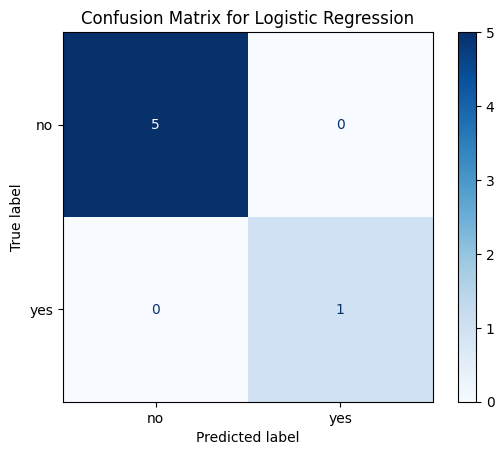

Classification Report for SVM:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00         5
         yes       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



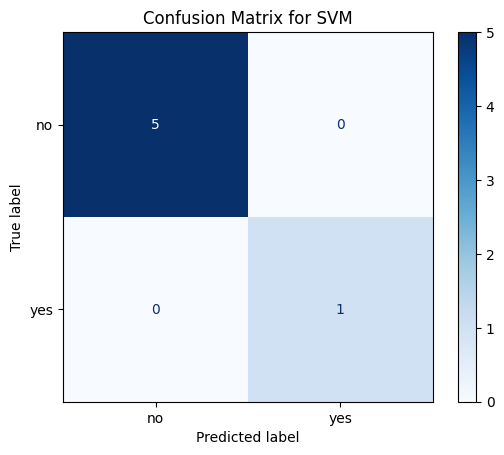

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

for model_name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    X_train, X_test, y_train, y_test = train_test_split(data[['Comment'] + numerical_features], data['Recommended'], test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
